In [1]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
sys.path.append('/Users/smil/Projects/cato/scripts/')
from load_datasets import read_1d_dataset
sns.set_context('talk')

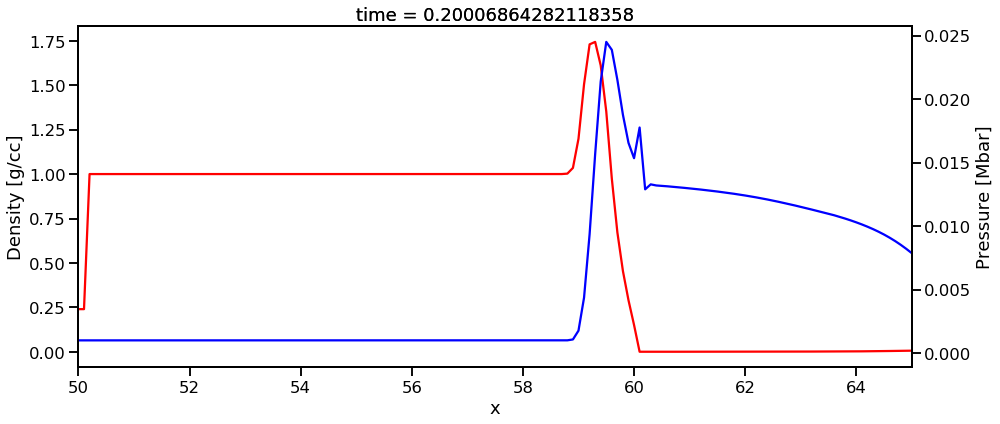

In [23]:
ds = read_1d_dataset(folder='.', units='icf')
fig, rho_ax = plt.subplots(figsize=(14,6))
p_ax = rho_ax.twinx()

t=-1

color = 'r'
ds.Density[t].plot(ax=rho_ax,color=color)
# rho_ax.set_ylabel('Density', color=color)
# rho_ax.tick_params(axis='y', labelcolor=color)

color='b'
ds.Pressure[t].plot(ax=p_ax,color=color)
# p_ax.set_ylabel('Pressure', color=color)
# p_ax.tick_params(axis='y', labelcolor=color)

# v_ax = rho_ax.twinx()
# color='k'
# ds.x_velocity[-1].plot(ax=v_ax, color=color)
# v_ax.set_ylabel('Velocity', color=color)
# v_ax.spines["right"].set_position(("axes", 1.05))
# v_ax.tick_params(axis='y', labelcolor=color)

# plt.xlim(.7,1)
# rho_ax.set_ylim(0,.1)
plt.tight_layout()
plt.xlim(50,65)
plt.show()


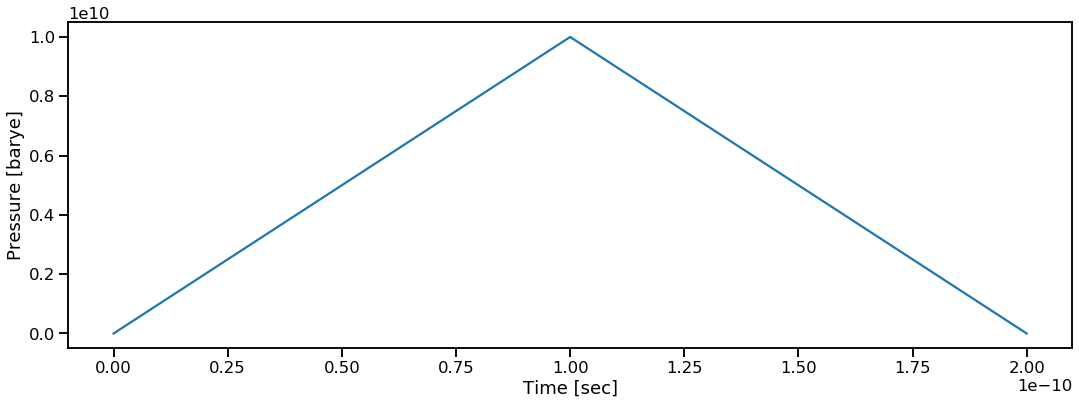

In [11]:
pulse = np.loadtxt('energy_input.dat')
plt.figure(figsize=(18,6))
plt.plot(pulse[:,0], pulse[:,1])
# plt.xlim(0,2e-5)
plt.xlabel('Time [sec]')
plt.ylabel('Pressure [barye]')
plt.show()